In [30]:
from keras.applications import inception_v3
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from skimage import io,transform
import os
import sys
model_name = 'InceptionV3Tuned_Incident'

In [31]:
# counter = 0
# folder = '../Images/Incident/'
# data = pd.read_csv(os.path.join(folder, 'labels.csv'))
# imageFiles = os.listdir(folder)
# total = len(imageFiles)
# images = []
# labels = []
# size = 299
# for image_file in imageFiles:
#     if not image_file.endswith('.jpg'):
#         continue
#     img = io.imread(os.path.join(folder,image_file))
#     img = transform.resize(img, (size,size,3))
#     image_file = image_file.split('.')[0]
#     images.append(img)
#     labels.append(data[data.tid == float(image_file)].values[0][1:])
#     counter += 1
#     sys.stdout.write("\rProcessed: {0}/{1}".format(counter, total))
#     sys.stdout.flush()

# x = np.arratfy(images)
# y = np.array(labels)


# np.save('../Images/Incident/incident_x%s.npy' % size, x)
# np.save('../Images/Incident/incident_y%s.npy' % size, y)

In [32]:
size = 299
x = np.load('../Images/Incident/incident_x%s.npy' % size)
y = np.load('../Images/Incident/incident_y%s.npy' % size)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [40]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [41]:
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.models import Model
base = inception_v3.InceptionV3(include_top=False, classes=3, input_shape=(size,size,3), pooling='avg')
temp = base.output
# temp = GlobalAveragePooling2D()(temp)
temp = Dropout(0.5)(temp)
predictions = Dense(3, activation='sigmoid')(temp)
model = Model(inputs = base.input, outputs = predictions)

In [42]:
from keras.callbacks import ModelCheckpoint
# rmsp = rmsprop(lr=0.01, decay=0.9, epsilon=1, clipvalue=2)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

filepath="%s.best.hdf5" % model_name
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

hist = model.fit([x_train], y_train, batch_size=32, epochs=100, validation_data=([x_test], y_test), verbose=1, callbacks=callbacks_list)

Train on 551 samples, validate on 237 samples
Epoch 1/100
551/551 [==============================] - 14s 26ms/step - loss: 1.1924 - acc: 0.5027 - val_loss: 1.0092 - val_acc: 0.5570

Epoch 00001: val_loss improved from inf to 1.00919, saving model to InceptionV3Tuned_Incident.best.hdf5
Epoch 2/100
551/551 [==============================] - 8s 14ms/step - loss: 0.9504 - acc: 0.6261 - val_loss: 0.9332 - val_acc: 0.5612

Epoch 00002: val_loss improved from 1.00919 to 0.93316, saving model to InceptionV3Tuned_Incident.best.hdf5
Epoch 3/100
551/551 [==============================] - 8s 14ms/step - loss: 0.8296 - acc: 0.6606 - val_loss: 0.8682 - val_acc: 0.6582

Epoch 00003: val_loss improved from 0.93316 to 0.86824, saving model to InceptionV3Tuned_Incident.best.hdf5
Epoch 4/100
551/551 [==============================] - 8s 14ms/step - loss: 0.7109 - acc: 0.7695 - val_loss: 0.8774 - val_acc: 0.6287

Epoch 00004: val_loss did not improve from 0.86824
Epoch 5/100
551/551 [=====================


Epoch 00043: val_loss did not improve from 0.86824
Epoch 44/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2743 - acc: 0.9129 - val_loss: 1.0614 - val_acc: 0.6835

Epoch 00044: val_loss did not improve from 0.86824
Epoch 45/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2712 - acc: 0.9310 - val_loss: 1.0020 - val_acc: 0.7004

Epoch 00045: val_loss did not improve from 0.86824
Epoch 46/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2716 - acc: 0.9038 - val_loss: 1.0183 - val_acc: 0.7173

Epoch 00046: val_loss did not improve from 0.86824
Epoch 47/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2679 - acc: 0.9183 - val_loss: 1.0179 - val_acc: 0.7300

Epoch 00047: val_loss did not improve from 0.86824
Epoch 48/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2648 - acc: 0.9111 - val_loss: 1.0153 - val_acc: 0.7257

Epoch 00048: val_loss did not improve from 0.86824
Epoch 49/100



Epoch 00087: val_loss did not improve from 0.86824
Epoch 88/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2550 - acc: 0.9129 - val_loss: 1.2907 - val_acc: 0.7426

Epoch 00088: val_loss did not improve from 0.86824
Epoch 89/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2582 - acc: 0.9111 - val_loss: 1.2594 - val_acc: 0.7384

Epoch 00089: val_loss did not improve from 0.86824
Epoch 90/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2591 - acc: 0.9183 - val_loss: 1.2503 - val_acc: 0.7384

Epoch 00090: val_loss did not improve from 0.86824
Epoch 91/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2579 - acc: 0.9002 - val_loss: 1.2883 - val_acc: 0.7215

Epoch 00091: val_loss did not improve from 0.86824
Epoch 92/100
551/551 [==============================] - 8s 14ms/step - loss: 0.2561 - acc: 0.9056 - val_loss: 1.2760 - val_acc: 0.7426

Epoch 00092: val_loss did not improve from 0.86824
Epoch 93/100


In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("%s.json" % model_name, "w") as json_file:
    json_file.write(model_json)
    
# # serialize weights to HDF5
model.save_weights("%s.h5" % model_name)
print("Saved model to disk")

Saved model to disk


In [7]:
from keras.models import model_from_json
# load json and create model
json_file = open('%s.json' % model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("%s.h5" % model_name)
print("Loaded model from disk")

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

Loaded model from disk


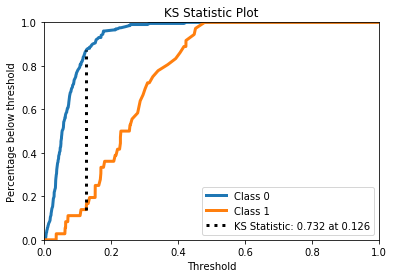

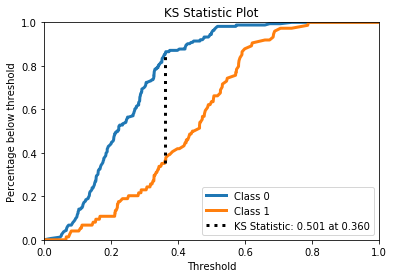

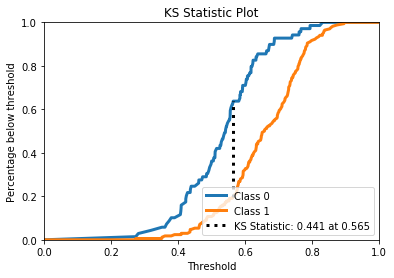

In [48]:
import scikitplot as skplt
skplt.metrics.plot_ks_statistic(y_test[:,0], list(zip(1-predicted[:,0], predicted[:,0])))
skplt.metrics.plot_ks_statistic(y_test[:,1], list(zip(1-predicted[:,1], predicted[:,1])))
skplt.metrics.plot_ks_statistic(y_test[:,2], list(zip(1-predicted[:,2], predicted[:,2])))

In [49]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score
predicted = model.predict([x_test])
final_predicted = np.array(list(zip(predicted[:,0] >= 0.126, predicted[:,1] >= 0.360, predicted[:,2] >= 0.565)))
print(classification_report(y_test, final_predicted))
print(precision_score(y_test, final_predicted, average='micro'))
print(recall_score(y_test, final_predicted, average='micro'))
print(roc_auc_score(y_test, predicted, average='micro'))
print(f1_score(y_test, final_predicted, average='micro'))

             precision    recall  f1-score   support

          0       0.54      0.86      0.67        36
          1       0.67      0.65      0.66        74
          2       0.84      0.80      0.82       168

avg / total       0.76      0.77      0.76       278

0.740484429065744
0.7697841726618705
0.8716001794407431
0.7548500881834216


In [46]:
from keras.models import model_from_json
# load json and create model
json_file = open('%s.json' % model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("%s.best.hdf5" % model_name)
print("Loaded model from disk")

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

Loaded model from disk


In [47]:
predicted = model.predict([x_test])
print(classification_report(y_test, predicted > 0.5))
print(precision_score(y_test, predicted > 0.5, average='micro'))
print(recall_score(y_test, predicted > 0.5, average='micro'))
print(roc_auc_score(y_test, predicted > 0.5, average='micro'))
print(f1_score(y_test, predicted > 0.5, average='micro'))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.75      0.36      0.49        74
          2       0.77      0.89      0.83       168

avg / total       0.66      0.64      0.63       278

0.7662337662337663
0.6366906474820144
0.7559896655423928
0.6954813359528488


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
